# MODELAGEM

## Seleção do Modelo Preditivo

LR: 0.988562 (0.022887)
LDA: 0.994444 (0.016667)
NB: 0.971569 (0.038751)
KNN: 0.943791 (0.043913)
CART: 0.904248 (0.061522)
SVM: 0.994118 (0.017647)


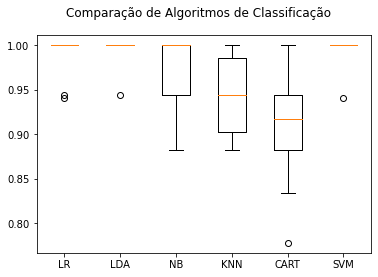

In [78]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Definindo número de folds
# n_folds = 10

# Lista de Modelos
modelos = []
modelos.append(('LR',   LogisticRegression()))
modelos.append(('LDA',  LinearDiscriminantAnalysis()))
modelos.append(('NB',   GaussianNB()))
modelos.append(('KNN',  KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM',  SVC()))

# Avaliando cada modelo em um loop
rs = []
nm = []

for nome, modelo in modelos:
    cv_rs = cross_val_score(estimator = modelo,
                            X = X_escalado,
                            y = y,
                            scoring = 'accuracy',
                            cv = kf)
    rs.append(cv_rs)
    nm.append(nome)
    
    msg = "%s: %f (%f)" % (nome, cv_rs.mean(), cv_rs.std())
    print(msg)
    
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(rs)
ax.set_xticklabels(nm)
plt.show()